### Import Libraries

In [972]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [973]:
url="https://gitlab.crio.do/me_notebook/me_jupyter_uberanalysis/-/raw/master/Uber_ride_analysis_dataset.csv"
df=pd.read_csv(url)
df.head()

,Request id,Pickup point,Drop point,Request timestamp,Start timestamp,Drop timestamp,Trip Cost,Extra Tip,Driver id,Trip Status,Ride Type,Payment Method,Weather
0,4386.0,Majestic Bus Station,Bangalore Palace,2021-07-13 0:00:24,NaN,NaN,0.00,0.0,61.0,Trip Cancelled,UberXL,NaN,Clear
1,4387.0,Lalbagh Botanical Garden,Indiranagar,2021-07-13 0:02:14,2021-07-13 0:16:00,2021-07-13 0:26:14,111.38,0.0,17.0,Trip Completed,UberGo,Cash,Cloudy
2,4388.0,Lalbagh Botanical Garden,Kormangala Police Station,2021-07-13 0:06:34,2021-07-13 0:14:01,2021-07-13 2:01:34,89.00,25.0,21.0,Trip Completed,UberXL,Card,Clear
3,4389.0,Majestic Bus Station,ISKCON Temple,2021-07-13 0:07:31,NaN,NaN,0.00,0.0,NaN,No Cars Available,UberXL,NaN,Rainy
4,4390.0,Bangalore City Railway Station,Lalbagh Botanical Garden,2021-07-13 0:07:58,2021-07-13 0:20:21,2021-07-13 0:40:58,307.40,25.0,35.0,Trip Completed,UberGo,Cash,Rainy


In [974]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6945 entries, 0 to 6944
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   float64
 1   Pickup point       6745 non-null   object 
 2   Drop point         6745 non-null   object 
 3   Request timestamp  6745 non-null   object 
 4   Start timestamp    5095 non-null   object 
 5   Drop timestamp     5095 non-null   object 
 6   Trip Cost          6745 non-null   float64
 7   Extra Tip          6745 non-null   float64
 8   Driver id          5970 non-null   float64
 9   Trip Status        6745 non-null   object 
 10  Ride Type          6745 non-null   object 
 11  Payment Method     5095 non-null   object 
 12  Weather            6745 non-null   object 
dtypes: float64(4), object(9)
memory usage: 705.5+ KB


### Data Cleaning

#### Handle Missing Values

In [975]:
df.columns

Index(['Request id', 'Pickup point', 'Drop point', 'Request timestamp',
       'Start timestamp', 'Drop timestamp', 'Trip Cost', 'Extra Tip',
       'Driver id', 'Trip Status', 'Ride Type', 'Payment Method', 'Weather'],
      dtype='object')

In [976]:
df.columns=df.columns.str.lower().str.replace(" ","_")
df.columns

Index(['request_id', 'pickup_point', 'drop_point', 'request_timestamp',
       'start_timestamp', 'drop_timestamp', 'trip_cost', 'extra_tip',
       'driver_id', 'trip_status', 'ride_type', 'payment_method', 'weather'],
      dtype='object')

#### Converting Date Columns into Datetime

In [977]:
df['request_timestamp']=pd.to_datetime(df['request_timestamp'],errors="coerce")
df['start_timestamp']=pd.to_datetime(df['start_timestamp'],errors="coerce")
df['drop_timestamp']=pd.to_datetime(df['drop_timestamp'],errors="coerce")

In [978]:
df.isnull().sum()

request_id            200
pickup_point          200
drop_point            200
request_timestamp     200
start_timestamp      1850
drop_timestamp       1850
trip_cost             200
extra_tip             200
driver_id             975
trip_status           200
ride_type             200
payment_method       1850
weather               200
dtype: int64

In [979]:
df.shape

(6945, 13)

In [980]:
df.dropna(subset=["trip_cost", "start_timestamp", "drop_timestamp"])


,request_id,pickup_point,drop_point,request_timestamp,start_timestamp,drop_timestamp,trip_cost,extra_tip,driver_id,trip_status,ride_type,payment_method,weather
1,4387.0,Lalbagh Botanical Garden,Indiranagar,2021-07-13 00:02:14,2021-07-13 00:16:00,2021-07-13 00:26:14,111.38,0.0,17.0,Trip Completed,UberGo,Cash,Cloudy
2,4388.0,Lalbagh Botanical Garden,Kormangala Police Station,2021-07-13 00:06:34,2021-07-13 00:14:01,2021-07-13 02:01:34,89.00,25.0,21.0,Trip Completed,UberXL,Card,Clear
4,4390.0,Bangalore City Railway Station,Lalbagh Botanical Garden,2021-07-13 00:07:58,2021-07-13 00:20:21,2021-07-13 00:40:58,307.40,25.0,35.0,Trip Completed,UberGo,Cash,Rainy
5,4391.0,Manyata Tech Park,Kempegowda International Airport (KIAL),2021-07-13 00:08:23,2021-07-13 00:12:48,2021-07-13 00:44:23,379.75,40.0,84.0,Trip Completed,UberGo,UPI,Clear
6,4392.0,MG Road,Koramangala Boho Street,2021-07-13 00:12:33,2021-07-13 00:15:22,2021-07-13 01:15:33,88.38,25.0,13.0,Trip Completed,UberXL,Card,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6739,11125.0,Koramangala Boho Street,Electronic City,2021-12-07 23:43:00,2021-12-07 23:52:23,2021-12-08 00:37:00,185.13,25.0,38.0,Trip Completed,UberGo,UPI,Clear
6741,11127.0,Koramangala Boho Street,Electronic City,2021-12-07 23:53:00,2021-12-07 23:53:18,2021-12-08 01:18:00,185.13,25.0,2.0,Trip Completed,UberX,Card,Clear
6742,11128.0,KR Puram Railway Station,HSR Layout,2021-12-07 23:53:00,2021-12-07 23:55:08,2021-12-08 00:16:00,259.25,25.0,13.0,Trip Completed,UberGo,UPI,Clear
6743,11129.0,Bangalore City Railway Station,Indiranagar,2021-12-07 23:54:00,2021-12-07 23:59:15,2021-12-08 01:15:00,469.40,25.0,49.0,Trip Completed,UberX,UPI,Rainy


In [981]:
df['driver_id']=df['driver_id'].fillna(-1)  # -1 for unassigned driver

In [982]:
mode=df['payment_method'].mode()[0]
df['payment_method'].fillna(mode,inplace=True)

C:\Users\arani\AppData\Local\Temp\ipykernel_22652\985567405.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['payment_method'].fillna(mode,inplace=True)


In [983]:
df.isnull().sum()

request_id            200
pickup_point          200
drop_point            200
request_timestamp     200
start_timestamp      1850
drop_timestamp       1850
trip_cost             200
extra_tip             200
driver_id               0
trip_status           200
ride_type             200
payment_method          0
weather               200
dtype: int64

In [984]:
df['payment_method'].unique()

array(['Cash', 'Card', 'UPI'], dtype=object)

In [985]:
df['ride_type'].unique()

array(['UberXL', 'UberGo', 'UberX', nan], dtype=object)

In [986]:
df.shape

(6945, 13)

#### Feature Engineering

In [987]:
df['total_cost']=df['trip_cost']+df['extra_tip']


In [988]:
df['trip_duration']=(df['drop_timestamp']-df['start_timestamp']).dt.total_seconds()/60
df['date']=pd.DatetimeIndex(df['start_timestamp']).date
df['hour'] = (df['start_timestamp']).dt.hour
df['minute'] = (df['start_timestamp']).dt.minute
df['day'] = df['start_timestamp'].dt.day_name()  # Monday, Tuesday, etc.
df['day-night']=pd.cut(x=df['hour'],bins=[0,10,15,19,24],labels=["morning","afternoon","evening","night"], right=False  )

### Detecting & Handling the Outliers

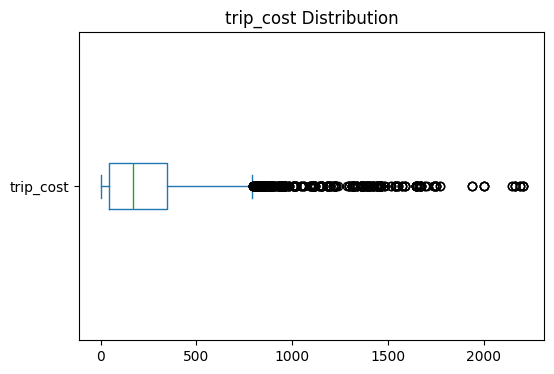

In [989]:
# Plot boxplot for trip cost
plt.figure(figsize=(6, 4))
df['trip_cost'].plot(kind='box', vert=False)
plt.title('trip_cost Distribution')
plt.show()

In [990]:
numeric_cols=['trip_cost', 'extra_tip', 'total_cost']
print(numeric_cols)
for cols in numeric_cols:
    Q1=df[cols].quantile(0.25)
    Q3=df[cols].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    num_outliers=df[(df[cols]<lower)|(df[cols]>upper)].shape[0]
    print(f"{cols}: {num_outliers} outliers detected")

    df[cols]=df[cols].clip(lower,upper)

['trip_cost', 'extra_tip', 'total_cost']
trip_cost: 442 outliers detected
extra_tip: 100 outliers detected
total_cost: 445 outliers detected


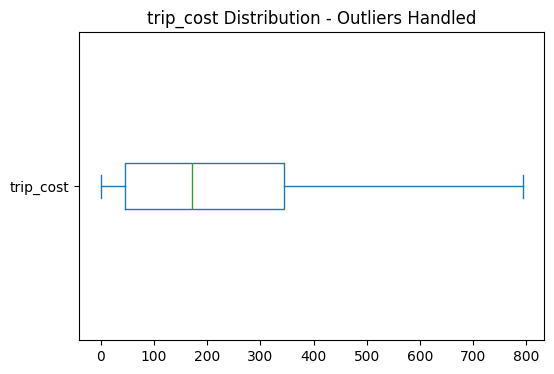

In [991]:
# Plot boxplot for trip cost
plt.figure(figsize=(6, 4))
df['trip_cost'].plot(kind='box', vert=False)
plt.title('trip_cost Distribution - Outliers Handled')
plt.show()


### 📊 Exploratory Data Analysis (EDA)

Now that the data cleaning is done, let's perform EDA to understand the dataset better and derive insights.


#### 1. Dataset Overview

In [992]:
df.shape

(6945, 20)

In [993]:
df.dtypes

request_id                  float64
pickup_point                 object
drop_point                   object
request_timestamp    datetime64[ns]
start_timestamp      datetime64[ns]
drop_timestamp       datetime64[ns]
trip_cost                   float64
extra_tip                   float64
driver_id                   float64
trip_status                  object
ride_type                    object
payment_method               object
weather                      object
total_cost                  float64
trip_duration               float64
date                         object
hour                        float64
minute                      float64
day                          object
day-night                  category
dtype: object

#### 2. Trip Status Breakdown

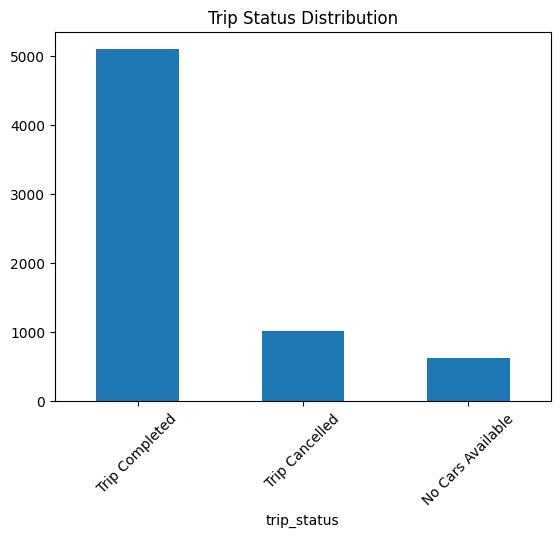

In [994]:
plt.Figure(figsize=(2,4))
df['trip_status'].value_counts().plot(kind='bar')
plt.title("Trip Status Distribution")
plt.xticks(rotation=45)
plt.show()

#### 3. Trip Cost Distribution

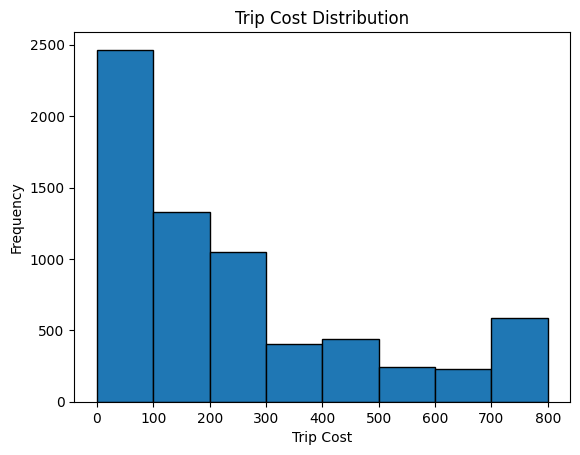

In [995]:
import numpy as np
import matplotlib.pyplot as plt

max_cost = df['trip_cost'].max()
bins = np.arange(0, max_cost + 100, 100)
plt.Figure(figsize=(2,4))

df['trip_cost'].hist(bins=bins, edgecolor='black')
plt.title("Trip Cost Distribution")
plt.xlabel("Trip Cost")
plt.ylabel("Frequency")
plt.grid(False)  
plt.show()

#### 4. Analyze Payment Methods

In [996]:
df.groupby('payment_method')['trip_cost'].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False)

,mean,median,count
payment_method,,,
Card,316.517799,231.50,1708
UPI,315.056717,233.75,1663
Cash,156.880047,45.00,3374


#### 5. Trip Duration Analysis


In [997]:
df['trip_duration_minutes'] = (df['drop_timestamp'] - df['start_timestamp']).dt.total_seconds() / 60

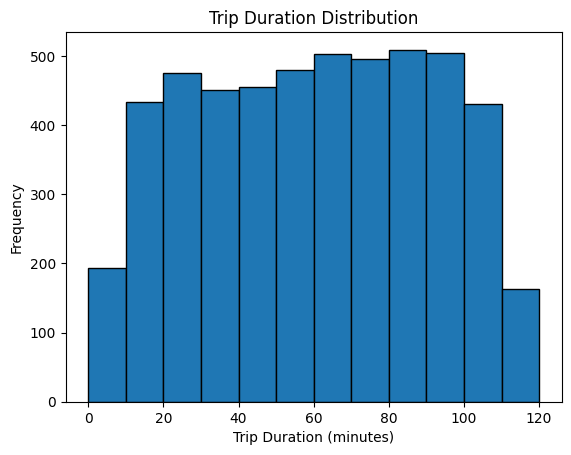

In [998]:
import numpy as np
import matplotlib.pyplot as plt

max_duration = df['trip_duration_minutes'].max()
bins = np.arange(0, max_duration + 10, 10)  # bins of size 10 minutes
plt.Figure(figsize=(4,4))

# Plot histogram
df['trip_duration_minutes'].hist(bins=bins, edgecolor='black')
plt.title("Trip Duration Distribution")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Frequency")
plt.grid(False)  
plt.show()

#### 3. Extract Date Time

In [999]:
df['request_date'] = df['request_timestamp'].dt.date
df['start_date'] = df['start_timestamp'].dt.date
df['drop_date'] = df['drop_timestamp'].dt.date

df['request_day'] = df['request_timestamp'].dt.day_name()
df['start_day'] = df['start_timestamp'].dt.day_name()
df['drop_day'] = df['drop_timestamp'].dt.day_name()

df['request_time'] = df['request_timestamp'].dt.time
df['start_time'] = df['start_timestamp'].dt.time
df['drop_time'] = df['drop_timestamp'].dt.time

df['request_hour'] = df['request_timestamp'].dt.hour
df['start_hour'] = df['start_timestamp'].dt.hour
df['drop_hour'] = df['drop_timestamp'].dt.hour

#### 4. Ride Delay

In [1000]:
df["ride_delay"] = ((df["drop_timestamp"] - df["start_timestamp"]).dt.total_seconds() / 3600).round(2)

#### 5. Cancellation Reasons

In [1001]:
df['cancellation_reason'] = np.where(
    (df['driver_id'] == -1) & (df['trip_status'] == 'No Cars Available'), 'No Cabs',
    np.where(
        (df['driver_id'] == -1) & (df['trip_status'] == 'Trip Cancelled'), 'Passenger',
        np.where(
            (df['driver_id'] != -1) & (df['trip_status'] == 'Trip Cancelled'), 'Driver',
            'Trip Completed'
        )
    )
)

### Analysis

Selecting columns relevant to our analysis

In [1002]:
new_df = df[['request_id', 'driver_id', 'trip_status', 'request_day', 'request_hour','start_day', 'start_hour', 'drop_day', 'drop_hour', 'trip_cost',
            'ride_delay', 'weather', 'cancellation_reason']]

new_df.columns

Index(['request_id', 'driver_id', 'trip_status', 'request_day', 'request_hour',
       'start_day', 'start_hour', 'drop_day', 'drop_hour', 'trip_cost',
       'ride_delay', 'weather', 'cancellation_reason'],
      dtype='object')

#### Request Count Vs Day

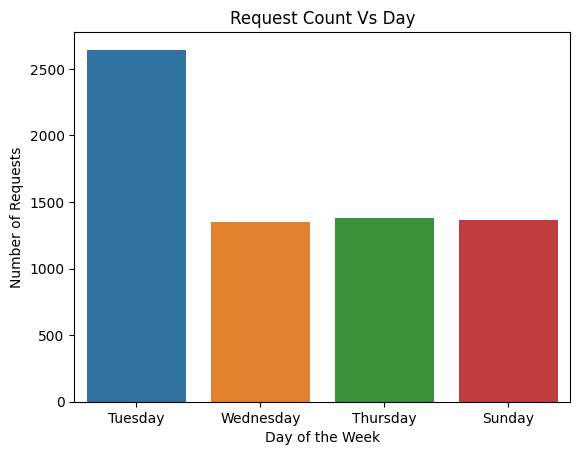

In [1003]:
sns.countplot(
    new_df,
    x='request_day',
    hue='request_day',  # This applies palette correctly
    # palette='BuGn',  # Try 'Set1', 'Pastel1', 'husl', 'coolwarm', etc.
    legend=False
)
plt.Figure(figsize=(2,6))
plt.title("Request Count Vs Day")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Requests")
plt.show()

#### Request Count Vs Hour

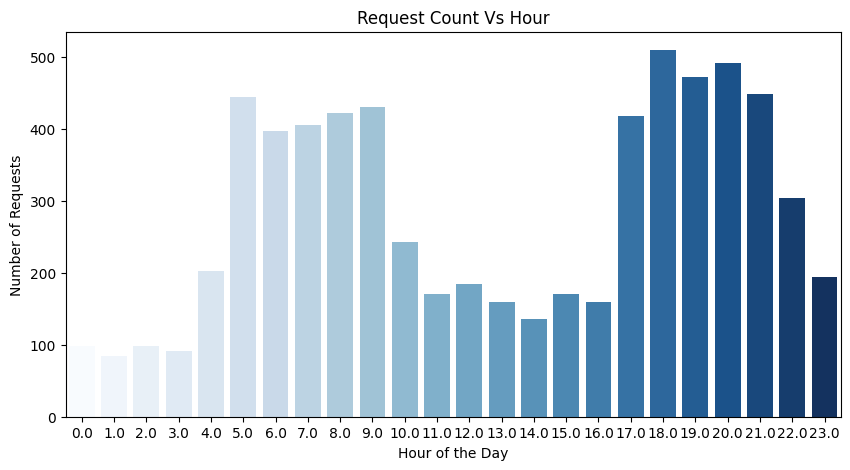

In [1004]:

plt.figure(figsize = (10, 5))

sns.countplot(
    new_df,
    x='request_hour',
    hue='request_hour',  # This applies palette correctly
    palette='Blues',  # Try 'Set1', 'Pastel1', 'husl', 'coolwarm', etc.
    legend=False
)

plt.title("Request Count Vs Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Requests")
plt.show()

In [1005]:
trip_status_rates = new_df['trip_status'].value_counts(normalize=True) * 100
print(trip_status_rates)

trip_status
Trip Completed       75.537435
Trip Cancelled       15.151964
No Cars Available     9.310600
Name: proportion, dtype: float64


#### Trip Status Bifurcation

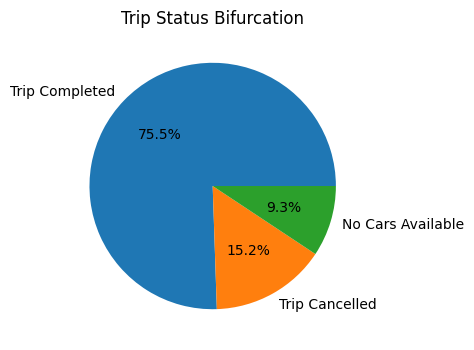

In [1006]:
plt.figure(figsize=(6, 4))
plt.pie(trip_status_rates , labels = trip_status_rates.index, autopct = '%1.1f%%')

plt.title("Trip Status Bifurcation")
plt.show()

#### Trip Cancellation Trend

Cancellation Trends (Driver vs Passenger):
cancellation_reason
Driver       875
Passenger    147
Name: count, dtype: int64


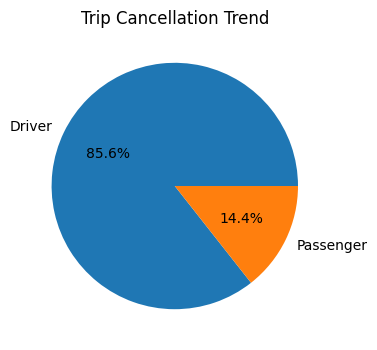

In [1007]:

cancellation_trends = new_df[new_df['trip_status'] == 'Trip Cancelled']['cancellation_reason'].value_counts()

# Print the cancellation trends
print(f"Cancellation Trends (Driver vs Passenger):")
print(cancellation_trends)

plt.figure(figsize=(6, 4))
plt.pie(cancellation_trends , labels = cancellation_trends.index, autopct = '%1.1f%%')

plt.title("Trip Cancellation Trend")
plt.show()

### Looking deeper into not completed trips

In [1008]:
selected_columns = [
    'request_id', 'pickup_point', 'drop_point',
    'driver_id', 'trip_status',
    'payment_method', 'weather',
    'request_day', 'request_hour',
    'cancellation_reason'
]
df_new = df[selected_columns]
df_incom_rides = df_new[df_new['trip_status'] != 'Trip Completed']
df_incom_rides.head()

,request_id,pickup_point,drop_point,driver_id,trip_status,payment_method,weather,request_day,request_hour,cancellation_reason
0,4386.0,Majestic Bus Station,Bangalore Palace,61.0,Trip Cancelled,Cash,Clear,Tuesday,0.0,Driver
3,4389.0,Majestic Bus Station,ISKCON Temple,-1.0,No Cars Available,Cash,Rainy,Tuesday,0.0,No Cabs
9,4395.0,UB City,Lalbagh Botanical Garden,2.0,Trip Cancelled,Cash,Clear,Tuesday,0.0,Driver
14,4400.0,KR Puram Railway Station,Embassy Tech Village,69.0,Trip Cancelled,Cash,Clear,Tuesday,0.0,Driver
17,4403.0,BTM Layout,Orion Mall,94.0,Trip Cancelled,Cash,Cloudy,Tuesday,0.0,Driver


#### Proportion of Incomplete Ride Statuses

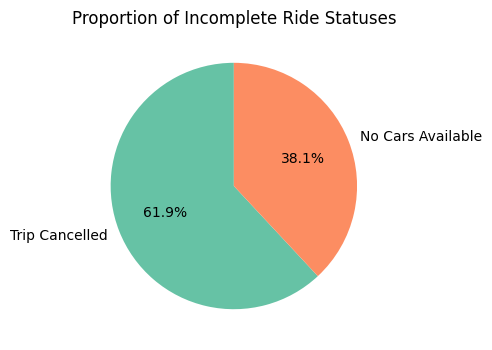

In [1009]:
trip_status_proportion = df_incom_rides['trip_status'].value_counts(normalize=True)*100

plt.figure(figsize=(6, 4))
plt.pie(trip_status_proportion, labels = trip_status_proportion.index, autopct='%1.1f%%',startangle=90,colors=sns.color_palette('Set2'))
plt.title('Proportion of Incomplete Ride Statuses')

plt.show()

#### Incomplete Rides by Day and Reason

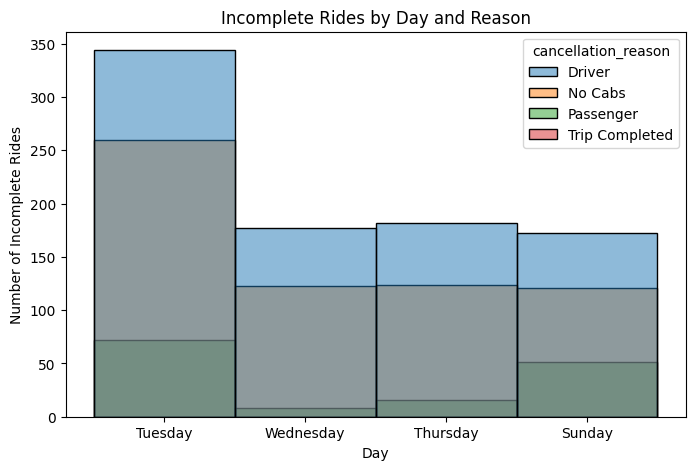

In [1010]:
plt.figure(figsize=(8, 5))

sns.histplot(x = 'request_day', hue='cancellation_reason', data = df_incom_rides, edgecolor = 'black')
plt.title('Incomplete Rides by Day and Reason')
plt.xlabel('Day')
plt.ylabel('Number of Incomplete Rides')
plt.show()

#### Incomplete Rides by Hour and Reason

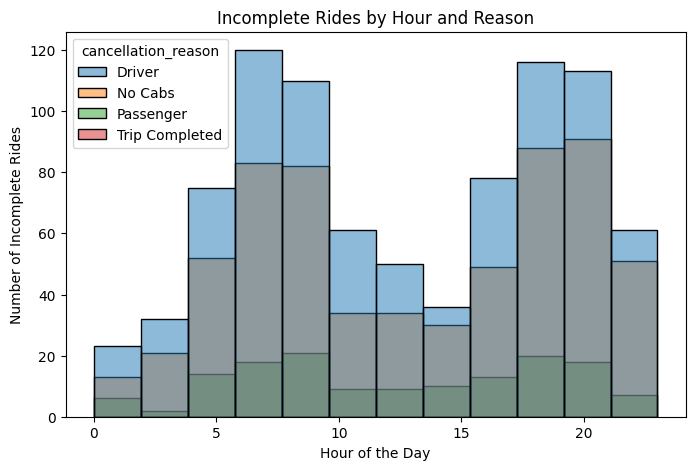

In [1011]:
plt.figure(figsize=(8, 5))

sns.histplot(x = 'request_hour', hue='cancellation_reason', data = df_incom_rides, edgecolor = 'black')
plt.title('Incomplete Rides by Hour and Reason')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incomplete Rides')
plt.show()

#### 4.Cancellations by Weather and Reason per Ride Type

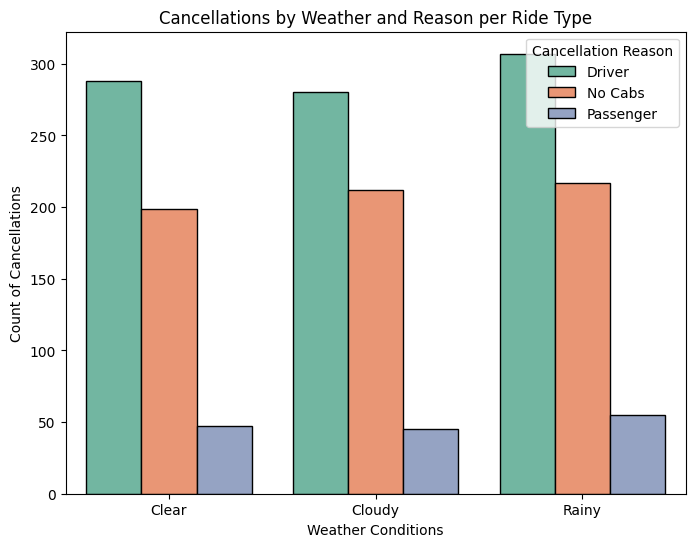

In [1012]:
weather_cancel = df_incom_rides.groupby(['weather', 'cancellation_reason']).size().reset_index(name='count')

# 2. Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(
    x='weather',
    y='count',
    hue='cancellation_reason',
    data=weather_cancel,
    palette='Set2',
    edgecolor='black'
)

# 3. Add title and axis labels
plt.title('Cancellations by Weather and Reason per Ride Type')
plt.xlabel('Weather Conditions')
plt.ylabel('Count of Cancellations')
plt.legend(title='Cancellation Reason')

# 4. Show the plot
plt.show()